In [ ]:
Ans of ques 4B

In [16]:
# Uploading modules and dataset
 
from sklearn.datasets  import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
 

In [17]:
cancer = load_breast_cancer()

In [6]:
# Building dataframe
df =  pd.DataFrame(can.data, columns = cancer.feature_names)
df['target'] = cancer.target
 
pd.set_option('max_columns', 31)
pd.set_option('display.width', None)
 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
# separating features and target
 
features =['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [29]:
#  Normalization
 
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [30]:
#  selecting the number of attributes with variance ratio > 98% 
 
def variance_ratio_calculator(n):
    
       
    pca = PCA(n_components=n)
    pca_components = pca.fit_transform(x)
    return sum(pca.explained_variance_ratio_)*100
 
for i in range(30):
    if variance_ratio_calculator(i+1) > 98:
        # print("Number of principle components required for more than 98% total variance ratio:", i+1)
        break

In [25]:
#  making a new dataset from the principle components
 
pca = PCA(n_components=i+1)
pca_components = pca.fit_transform(x)
pca_DF = pd.DataFrame(data = pca_components)
new_data = pd.concat([pca_DF, df[['target']]], axis = 1)
new_data.head()
 
new_x = new_data.iloc[:,:14]
new_y = new_data.iloc[:,14]
 
## splititing the dataset
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, random_state=11, test_size=.3)
 

In [31]:
## training the model for different k value
 
from sklearn.model_selection import KFold, cross_val_score
 
for k in range (2,15):
    kfold = KFold(n_splits=10, random_state = 11, shuffle = True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold)
    print('K = {0:<4}\tMean Accuracy = {1:.2%}\t\tStandard Deviation = {2:.2}'.format(k,scores.mean(), scores.std()))
    
 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X_test)
expected = y_test
 
print('\n Mismatched Prdiction: ')
wrong = [(p,e) for (p,e) in zip (predicted,expected) if p!=e]
print(wrong,"\n\n")
 

K = 2   	Mean Accuracy = 95.50%		Standard Deviation = 0.031
K = 3   	Mean Accuracy = 96.75%		Standard Deviation = 0.03
K = 4   	Mean Accuracy = 96.75%		Standard Deviation = 0.025
K = 5   	Mean Accuracy = 96.24%		Standard Deviation = 0.028
K = 6   	Mean Accuracy = 95.74%		Standard Deviation = 0.034
K = 7   	Mean Accuracy = 96.23%		Standard Deviation = 0.026
K = 8   	Mean Accuracy = 96.23%		Standard Deviation = 0.026
K = 9   	Mean Accuracy = 95.98%		Standard Deviation = 0.026
K = 10  	Mean Accuracy = 96.74%		Standard Deviation = 0.03
K = 11  	Mean Accuracy = 96.73%		Standard Deviation = 0.023
K = 12  	Mean Accuracy = 96.73%		Standard Deviation = 0.028
K = 13  	Mean Accuracy = 96.73%		Standard Deviation = 0.02
K = 14  	Mean Accuracy = 96.73%		Standard Deviation = 0.02

 Mismatched Prdiction: 
[(1, 0), (1, 0), (1, 0), (1, 0)] 




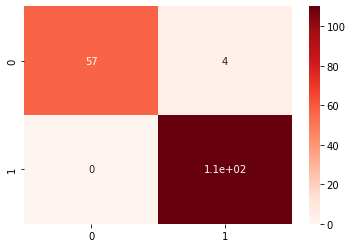

In [26]:
# Confusion matrix
 
from sklearn.metrics import confusion_matrix
 
confusion  = confusion_matrix(y_true = expected, y_pred = predicted)
confusion_df= pd.DataFrame(confusion, index = range(2), columns = range(2))
sns.heatmap(confusion_df, annot= True, cmap = 'Reds')
plt.show()
 

In [27]:
# Classification report 
 
 
from sklearn.metrics import classification_report
 
print('\nClassification Report: \n')
print(classification_report(expected, predicted, target_names = cancer.target_names))


Classification Report: 

              precision    recall  f1-score   support

   malignant       1.00      0.93      0.97        61
      benign       0.96      1.00      0.98       110

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [28]:
df =  pd.DataFrame(cancer.data, columns = can.feature_names)
df['target'] = cancer.target
 
pd.set_option('max_columns', 31)
pd.set_option('display.width', None)
 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
